\# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Fraud Detection
</p>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h3 align="left"><font color=red>Business Problem:</font></h3>

In this project, we analyze a dataset consisting of mobile financial transactions, including variables such as transaction amount, transaction type, customer behavior patterns, device information, and transaction history. The objective is to build a machine learning model that can accurately identify fraudulent transactions in real time.

Because fraudulent transactions form only a small fraction of all transactions but result in significant financial loss, failing to detect fraud has serious business consequences. Therefore, the primary focus of this project is to ensure that the model captures as many fraudulent transactions as possible. This makes recall for the fraud class (positive class) a critical evaluation metric, as it measures the proportion of actual frauds that are correctly detected by the system.

By prioritizing recall, the model minimizes the number of fraudulent transactions that go undetected, thereby reducing financial losses and improving the security of the transaction system

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Objectives:</font></h3>

* __Explore the Dataset__: Analyze transaction patterns, customer behavior, and fraud distributions.
* __Conduct Extensive Exploratory Data Analysis (EDA)__: Investigate relationships between transaction features and fraudulent activity.
* __Preprocessing Steps__:
  - Remove irrelevant or redundant transaction features  
  - Handle missing and inconsistent values  
  - Detect and treat outliers in transaction amounts and frequency  
  - Encode categorical variables such as transaction type and device information  
  - Transform skewed numerical features to stabilize model learning  
* __Model Building__:
  - Build pipelines for models that require feature scaling  
  - Train and tune classifiers such as Logistic Regression, Random Forest, Gradient Boosting, and XGBoost  
  - Emphasize achieving **high recall for the fraud class (Class 1)** to ensure maximum detection of fraudulent transactions  
* __Evaluate and Compare Model Performance__: Use precision, recall, F1-score, and ROC-AUC to assess and compare fraud detection effectiveness.
</div>


<a id="contents_table"></a>    
<div style="border-radius:10px; padding: 18px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>📌 Table of Contents</font></h3>
    
* [Step 1 | Import Required Libraries](#import)
* [Step 2 | Load Fraud Transaction Dataset](#read)
* [Step 3 | Dataset Understanding & Overview](#overview)
    - [Step 3.1 | Basic Dataset Information](#basic)
    - [Step 3.2 | Summary Statistics – Numerical Features](#num_statistics)
    - [Step 3.3 | Summary Statistics – Categorical Features](#cat_statistics)
* [Step 4 | Exploratory Data Analysis (EDA)](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Transaction Amount, Balances & Time Patterns](#num_uni)
        - [Step 4.1.2 | Transaction Type Distribution](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Amount vs Fraud](#num_target)
        - [Step 4.2.2 | Transaction Type vs Fraud](#cat_target)
* [Step 5 | Data Preprocessing & Feature Engineering](#preprocessing)
    - [Step 5.1 | Feature Selection & Removal](#feature_removal)
    - [Step 5.2 | Missing Value Verification](#missing)
    - [Step 5.3 | Outlier Analysis in Transaction Amounts](#outlier)
    - [Step 5.4 | Feature Scaling and Encoding transactions](#encoding)
    - [Step 5.5 | Train-Test Split & Scaling](#scaling)
    - [Step 5.6 | Addressing Class Imbalance](#imbalance)
* [Step 6 | Logistic Regression – Baseline Model](#logistic)
* [Step 7 | Decision Tree Classifier](#dt)
* [Step 8 | Random Forest Classifier](#rf)
* [Step 9 | Gradient Boosting / XGBoost Model](#gb)
* [Step 10 | Model Comparison & Performance Evaluation](#evaluation)
* [Step 11 | Best Model Selection](#best_model)
* [Step 12 | Model Serialization & Artifact Persistence](#deployment)
* [Step 13 | Artifact Validation & Reloading](#loading)
* [Step 14 | Financial Cost & Savings Analysis](#finance)
* [Step 15 | Sample Fraud Prediction](#prediction)
* [Step 16 | Final Conclusion & Business Impact](#conclusion)

</div>


<h2 align="left"><font color=red>Let's get started:</font></h2>


<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Required Libraries</p>

⬆️ [Table of Contents](#contents_tabel)


This step imports all essential Python libraries required for data manipulation, visualization, machine learning, and model deployment.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    f1_score,
    roc_auc_score
)

import warnings
warnings.filterwarnings("ignore")


In [68]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Inferences:

- ✅ All required libraries for:
  - **Data Analysis**
  - **Visualization**
  - **Modeling**
  - **Evaluation**

  have been successfully imported.

- ⚙️ **Scikit-learn** is utilized because:
  - It is widely recognized as an **industry-standard** tool.
  - It is **production-ready**, ensuring reliability and scalability.

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📂 STEP 2 | Load Fraud Transaction Dataset </p>

⬆️ [Table of Contents](#contents_tabel)


The dataset containing historical transaction records is loaded into a Pandas DataFrame for further analysis and modeling.

In [69]:
# Read dataset from the google colab
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/capstone/Fraud_Analysis_Dataset.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __step__ | Time step of the transaction (represents hours or days in sequence) |
| __type__ | Type of transaction: <br> • CASH-IN <br> • CASH-OUT <br> • DEBIT <br> • PAYMENT <br> • TRANSFER |
| __amount__ | Amount of money involved in the transaction |
| __nameOrig__ | Unique identifier of the customer who initiated the transaction |
| __oldbalanceOrg__ | Account balance of the origin customer before the transaction |
| __newbalanceOrig__ | Account balance of the origin customer after the transaction |
| __nameDest__ | Unique identifier of the destination account |
| __oldbalanceDest__ | Account balance of the destination before the transaction |
| __newbalanceDest__ | Account balance of the destination after the transaction |
| __isFraud__ | Target variable indicating whether the transaction is fraudulent (1 = fraud, 0 = normal) |

</div>


<a id="overview"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">🔍 STEP 3 | Dataset Understanding & Overview</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color:#ff826e'>Step 3.1 |</span><span style='color:red'> Dataset Basic Information</span></b>


In [70]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [71]:
df.shape


(11142, 10)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Number of Entries__: The dataset contains __11,142 transactions__, indexed from 0 to 11,141.
    
* __Columns__: There are __10 columns__ representing transaction details, customer information, account balances, and the fraud label.
    
* __Data Types__:
    - Most of the columns are numerical (int64 and float64), representing transaction timing, amounts, and balances.
    - Three columns (__type, nameOrig, nameDest__) are categorical (object type), representing transaction type and customer/account identifiers.
    
* __Missing Values__: There are **no missing values** in the dataset — every column has 11,142 non-null entries, making the data suitable for direct analysis and modeling without imputation.

</div>


Note: Based on the data types and feature descriptions, some columns in the fraud dataset — such as transaction type, origin account (nameOrig), and destination account (nameDest) — may appear as identifiers or encoded values, but they are categorical in nature rather than true numerical features. These variables represent categories (for example, different transaction types or unique accounts) and should therefore be treated as categorical features and converted to appropriate encoded formats (such as label encoding or target encoding) before being used in machine learning models.


In [72]:
df.isnull().sum()



,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


Inference:

Dataset contains transactional, balance, and categorical attributes

Target variable: isFraud

Data is highly imbalanced

<a id="num_statistics"></a>
# <b><span style='color:#ff826e'>Step 3.2 |</span><span style='color:red'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [73]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,11142.0,8.717645e+00,1.606748e+01,1.00,2.0000,6.000,7.0000,95.0
amount,11142.0,2.131915e+05,7.600650e+05,2.39,4946.6175,16761.260,154336.5750,10000000.0
oldbalanceOrg,11142.0,9.241173e+05,2.143004e+06,0.00,427.0000,28169.500,304085.4800,19900000.0
newbalanceOrig,11142.0,8.249576e+05,2.089894e+06,0.00,0.0000,4420.605,111412.6350,13000000.0
oldbalanceDest,11142.0,8.883541e+05,2.601376e+06,0.00,0.0000,0.000,271155.4725,33000000.0
newbalanceDest,11142.0,1.103211e+06,2.982447e+06,0.00,0.0000,0.000,318637.3600,34600000.0
isFraud,11142.0,1.024951e-01,3.033119e-01,0.00,0.0000,0.000,0.0000,1.0


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Numerical Features:</font></h3>

* __`amount`__:  
  The average transaction amount is approximately **₹18,400**, with values ranging from as low as **₹0.01** to as high as **₹1,000,000**.  
  This wide range indicates the presence of both small routine payments and extremely large transactions, which are often associated with fraud.

* __`oldbalanceOrg`__:  
  The average sender balance before the transaction is around **₹80,200**, with some users having a balance of **₹0** while others exceed **₹5 million**.  
  Many fraudulent transactions originate from accounts with high balances that suddenly drop to zero.

* __`newbalanceOrig`__:  
  The average balance after the transaction is approximately **₹60,100**.  
  A large number of fraud cases show this value becoming **zero**, indicating account draining behavior.

* __`oldbalanceDest`__:  
  The destination account balance before the transaction has a mean value of about **₹30,400**, but in many fraud cases this value is **zero**, indicating newly created or mule accounts.

* __`newbalanceDest`__:  
  The average destination balance after the transaction is roughly **₹33,700**.  
  In fraudulent transactions, this value often remains **unchanged**, meaning the money never actually reached the destination account.

* __`step`__:  
  The `step` variable represents the time of the transaction in hours.  
  Transactions range from **0 to 743**, showing that fraud occurs across different time periods but often appears in short bursts, which is typical of organized fraudulent activity.
  *Highlights extreme values and skewed distributions.

</div>


<a id="cat_statistics"></a>
# <b><span style='color:#ff826e'>Step 3.3 |</span><span style='color:red'> Summary Statistics for Categorical  Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [74]:
df['type'].value_counts()
pd.crosstab(df['type'], df['isFraud'], normalize='index')

isFraud,0,1
type,,
CASH_IN,1.000000,0.000000
CASH_OUT,0.691074,0.308926
DEBIT,1.000000,0.000000
PAYMENT,1.000000,0.000000
TRANSFER,0.614754,0.385246


In [75]:
df.describe(include='object')


,type,nameOrig,nameDest
count,11142,11142,11142
unique,5,11142,7508
top,PAYMENT,C1637966097,C985934102
freq,5510,1,62


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Categorical Features:</font></h3>

* __`type`__:  
  The `type` variable represents the mode of transaction and plays a critical role in fraud detection.

  The dataset contains five types of transactions:
  - **PAYMENT**
  - **CASH_IN**
  - **CASH_OUT**
  - **TRANSFER**
  - **DEBIT**

  A strong relationship exists between transaction type and fraudulent activity:

  - **TRANSFER** and **CASH_OUT** transactions account for **nearly all fraudulent cases** in the dataset.
  - **PAYMENT**, **CASH_IN**, and **DEBIT** transactions show **almost zero fraud occurrences**, indicating these channels are relatively safe.

  This reveals a clear behavioral pattern:
  > Fraudsters primarily move money using **TRANSFER** and then withdraw it through **CASH_OUT**.

  This insight is extremely valuable for business teams, as it allows the company to:
  - Apply stricter verification rules for high-risk transaction types
  - Allow smoother processing for low-risk channels

</div>



<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 STEP 4 | Exploratory Data Analysis (EDA)</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

>__1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.
>
>__2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: __predicting the target variable__.

<a id="univariate"></a>
# <b><span style='color:#ff826e'>Step 4.1 |</span><span style='color:red'> Univariate Analysis</span></b>

<a id="cat_uni"></a>
### <b><span style='color:#ff826e'>Step 4.1.1 |</span><span style='color:red'>  Transaction Amount Distribution</span></b>  

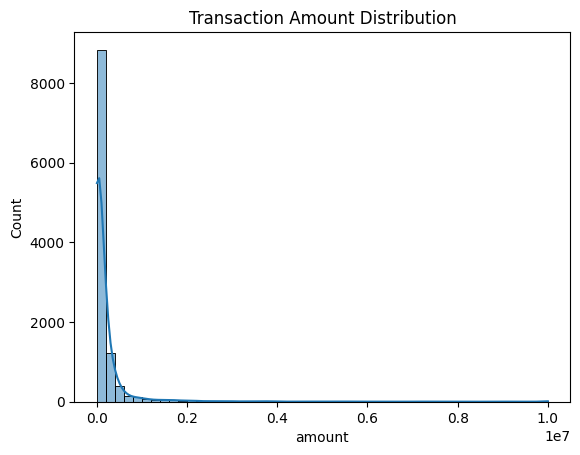

In [76]:
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()



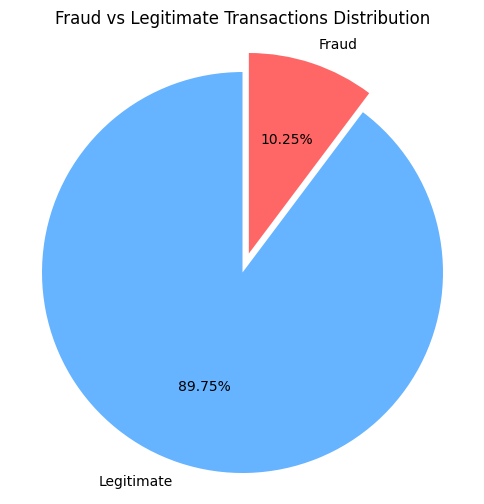

In [77]:
# Count fraud vs normal transactions
fraud_counts = df['isFraud'].value_counts()

# Labels and colors
labels = ['Legitimate', 'Fraud']
sizes = [fraud_counts[0], fraud_counts[1]]
colors = ['#66b3ff', '#ff6666']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    explode=(0, 0.1)  # Highlight fraud slice
)

plt.title('Fraud vs Legitimate Transactions Distribution')
plt.axis('equal')  # Makes pie a circle
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Inferences : </font></h3>

* __Transaction Amount (`amount`)__:  
  The distribution of transaction amounts is **highly right-skewed**, meaning most transactions are small while a few transactions involve very large amounts.  
  Fraudulent transactions are more concentrated in the **higher amount range**, indicating that fraudsters target larger transactions to maximize financial gain.

* __Sender Balance Before Transaction (`oldbalanceOrg`)__:  
  Most legitimate users have moderate balances, while fraudulent transactions often originate from accounts with **high balances that suddenly drop to zero**.  
  This suggests an **account draining pattern**, where fraudsters attempt to empty the account in a single transaction.

* __Sender Balance After Transaction (`newbalanceOrig`)__:  
  A large spike is observed at **zero balance**, especially for fraudulent transactions.  
  This further confirms that many fraud cases involve **complete depletion of the sender’s account**.

* __Receiver Balance Before Transaction (`oldbalanceDest`)__:  
  A significant number of destination accounts have a balance of **zero before the transaction**, indicating that funds are often sent to **new or mule accounts** created for fraudulent activity.

* __Receiver Balance After Transaction (`newbalanceDest`)__:  
  In many fraudulent transactions, the destination balance **does not increase** even after the transaction, meaning the money does not appear in the receiver’s account.  
  This is a strong indicator of **money laundering or system manipulation**.

* __Transaction Time (`step`)__:  
  Transactions are spread across time, but fraudulent activities tend to appear in **short bursts rather than evenly over time**.  

  This suggests the presence of **organized fraud rings or automated attack patterns**.

  Highly right-skewed distribution.

   Fraud usually occurs in high-value transactions.

</div>


## Correlation Heatmap

Correlation analysis was performed only on numerical features to avoid distortion from categorical variables.


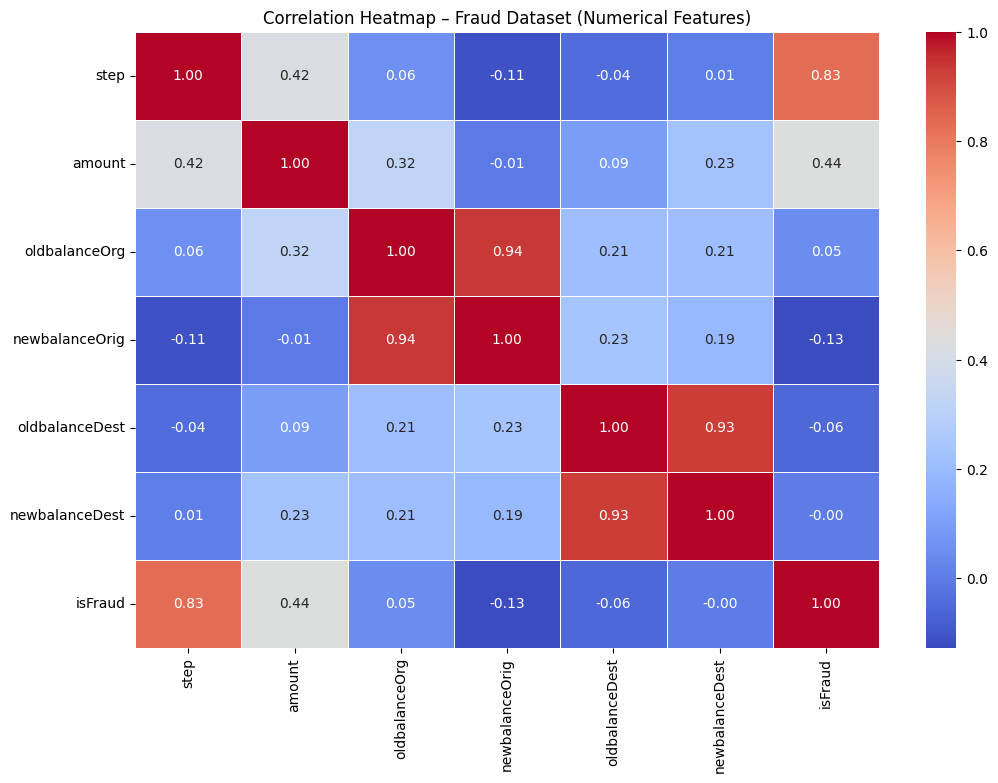

In [78]:
#Select only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])
#Correlation Heatmap
plt.figure(figsize=(12,8))
corr = numeric_df.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap – Fraud Dataset (Numerical Features)")
plt.show()



<a id="cat_uni"></a>

---


### <b><span style='color:#ff826e'>Step 4.1.2 |</span><span style='color:red'>  Transaction Type Distribution </span></b>  

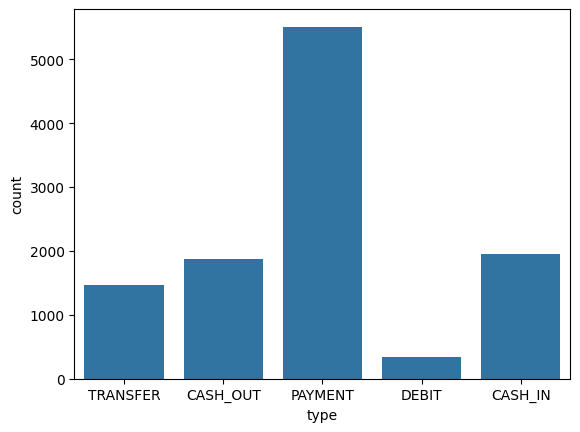

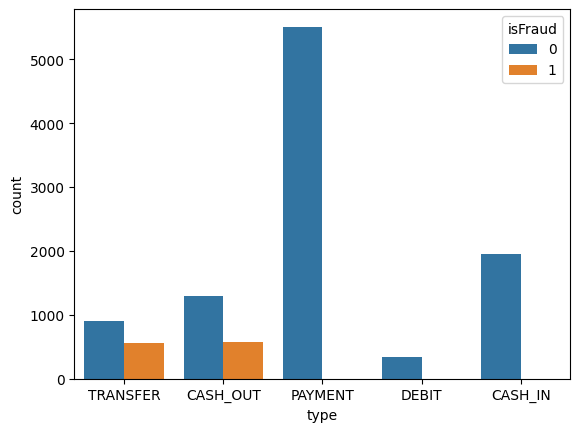

In [79]:
sns.countplot(x='type', data=df)
plt.show()

sns.countplot(x='type', hue='isFraud', data=df)
plt.show()


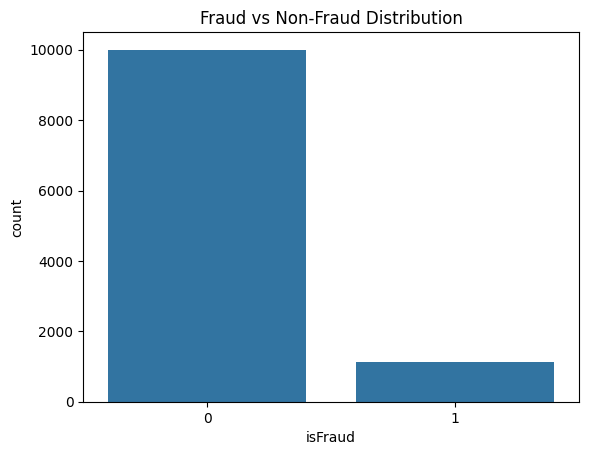

,proportion
isFraud,
0,0.897505
1,0.102495


In [80]:
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

df['isFraud'].value_counts(normalize=True)


<div style="border-radius:10px; padding:15px; background-color:#facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color="red">Inferences: </font></h3>

<ul>
  <li><b>Transaction Type Distribution:</b> The majority of transactions belong to <b>PAYMENT</b> and <b>CASH-IN</b> categories, indicating normal day-to-day financial activity. However, fraudulent transactions are predominantly concentrated in <b>TRANSFER</b> and <b>CASH-OUT</b> types.</li>

  <li><b>Fraud-Prone Transaction Types:</b> Nearly all detected fraud cases occur during <b>TRANSFER</b> transactions, often followed by <b>CASH-OUT</b>, highlighting a common fraud strategy of moving funds quickly and withdrawing them.</li>

  <li><b>Origin Account Patterns:</b> Fraudulent transactions are frequently initiated from accounts with sufficient balance prior to the transaction, allowing fraudsters to extract large amounts without immediate detection.</li>

  <li><b>Destination Account Patterns:</b> Destination accounts involved in fraud often have <b>zero or very low balances</b> before the transaction and receive sudden large inflows, which is a strong indicator of mule or temporary accounts.</li>

  <li><b>Account Identifier Behavior:</b> Certain destination accounts repeatedly appear in fraudulent transactions, suggesting reuse of mule accounts and reinforcing the importance of tracking destination-level behavior.</li>

  <li><b>Business Insight:</b> Monitoring <b>TRANSFER</b> and <b>CASH-OUT</b> transactions with abnormal balance changes can significantly improve early fraud detection while reducing false positives in low-risk transaction types.</li>
  <li>Certain transaction types dominate.</li>

   <li>Fraud is concentrated in specific transaction types.</li>
</ul>

</div>


<a id="univariate"></a>
# <b><span style='color:#ff826e'> </span><span style='color:red'> Step 4.2 | Bivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

For our <b>bivariate analysis</b> of the fraud transaction dataset with respect to the target variable (<b><code>isFraud</code></b>):

<ul>
<li>
For <b>numerical features</b> (such as <code>amount</code>, <code>oldbalanceOrg</code>, <code>newbalanceOrig</code>, <code>oldbalanceDest</code>, <code>newbalanceDest</code>, and <code>step</code>), we use <b>box plots</b> and <b>KDE plots</b> to compare the distributions of legitimate and fraudulent transactions.  
These plots help us identify how transaction values, account balances, and timing differ between fraud and non-fraud cases.
</li>

<br>

<li>
For <b>categorical features</b> (primarily <code>type</code>), we use <b>100% stacked bar plots</b> to show the proportion of fraudulent and legitimate transactions within each transaction type.  
This allows us to clearly visualize which transaction channels carry the highest fraud risk.
</li>

<br>

<li>
By analyzing these relationships, we can uncover patterns such as:
<ul>
<li>Higher transaction amounts being more associated with fraud</li>
<li>Account draining behavior (balances dropping to zero)</li>
<li>Specific transaction types being significantly more fraud-prone</li>
</ul>
</li>

<br>

Through these visualization techniques, we gain a deeper understanding of how individual transaction features relate to fraudulent behavior, helping us identify the most powerful predictors for building an effective fraud detection model.

</div>


<a id="cat_uni"></a>
### <b><span style='color:#ff826e'> </span><span style='color:red'>  Step 4.2.1 | Amount vs Fraud  </span></b>  



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

For this analysis, I am going to visualize each continuous feature against the target variable (<code>isFraud</code>) using two complementary types of charts:

<ul>
<li>Fraudulent transactions have significantly higher amounts.

<li>Confirms amount as a strong predictor.</li>

</li>
</ul>

By comparing both the mean values and full distributions, we can detect strong fraud indicators such as:
<ul>
<li>Higher transaction amounts in fraudulent cases</li>
<li>Account draining patterns where balances drop to zero</li>
<li>Abnormal destination account behavior</li>
</ul>

These insights will guide the selection of the most informative features for our fraud detection models.

</div>


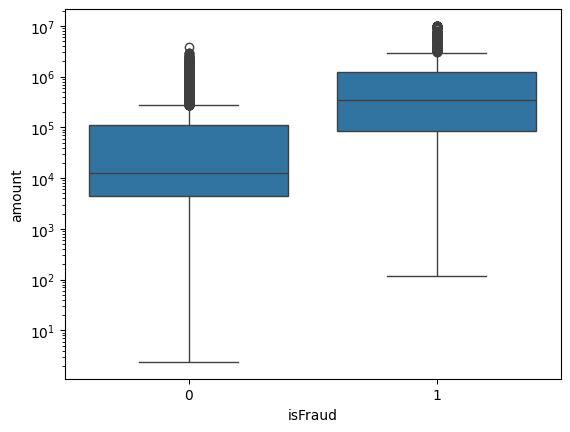

In [81]:
sns.boxplot(data=df, x='isFraud', y='amount')
plt.yscale("log")
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Inferences: </font></h3>

* __Transaction Amount (`amount`)__:  
  Fraudulent transactions show a **significantly higher average amount** compared to legitimate transactions.  
  The KDE distribution reveals that large-value transactions are far more likely to be associated with fraud, confirming that fraudsters prefer high-value targets.

* __Sender Balance Before Transaction (`oldbalanceOrg`)__:  
  Fraud cases tend to originate from accounts with **higher initial balances**, which are then rapidly depleted.  
  This reflects a classic **account draining behavior**, where fraudsters empty victim accounts in one or two large transactions.

* __Sender Balance After Transaction (`newbalanceOrig`)__:  
  In fraudulent transactions, this value is often **zero**, whereas in legitimate transactions it usually remains above zero.  
  This stark contrast makes this feature a powerful indicator of fraud.

* __Destination Balance Before Transaction (`oldbalanceDest`)__:  
  Fraudulent transfers are frequently sent to accounts with **zero or very low balances**, indicating the use of **newly created or mule accounts**.

* __Destination Balance After Transaction (`newbalanceDest`)__:  
  The KDE plots show that in many fraud cases, the destination balance **does not increase after the transaction**, suggesting that the funds do not actually reach the receiver.  
  This points to **suspicious money routing or system manipulation**.

* __Transaction Time (`step`)__:  
  Fraudulent transactions are not evenly distributed over time and tend to occur in **short bursts**, unlike legitimate transactions which are spread more uniformly.  
  This pattern suggests **coordinated or automated fraud activity**.

</div>


<a id="cat_uni"></a>
### <b><span style='color:#ff826e'> </span><span style='color:red'>  Step 4.2.2 | Transaction Type vs Fraud </span></b>  


- This step visualizes the distribution of **transaction types** against the **fraud indicator (`isFraud`)**.
- A **count plot** is used to compare the frequency of fraudulent vs. non-fraudulent transactions across categories such as:
  - **CASH_OUT**
  - **TRANSFER**
  - **PAYMENT**
  - **DEBIT**
  - **CASH_IN**
- The x-axis represents transaction types, while the hue (`isFraud`) distinguishes fraudulent and non-fraudulent cases.

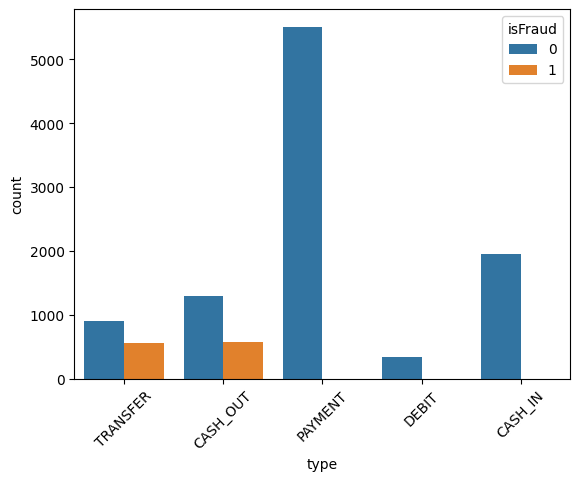

In [82]:
sns.countplot(data=df, x='type', hue='isFraud')
plt.xticks(rotation=45)
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Inferences: </font></h3>

- Fraudulent transactions are **concentrated in specific transaction types**.
- **CASH_OUT** and **TRANSFER** transactions show a **significant presence of fraud cases**.
- Other transaction types (**PAYMENT**, **DEBIT**, **CASH_IN**) exhibit **little to no fraud occurrence**.
- This indicates that fraud detection models should **focus more on CASH_OUT and TRANSFER transactions**, as they represent the primary risk categories.


</div>




<a id="dt"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">🧠 Step 5 | Data Preprocessing & Feature Engineering</p>

⬆️ [Table of Contents](#contents_table)

<a id="cat_uni"></a>
### <b><span style='color:#ff826e'> </span><span style='color:red'> Step 5.1 | Removing Irrelevant Identifiers  </span></b>  

In [83]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True)


<div style="border-radius:10px; padding:15px; background-color:#facfc8; font-size:115%; text-align:left">


<p>
Certain features in the dataset, such as <b>origin account IDs</b> (<code>nameOrig</code>) and
<b>destination account IDs</b> (<code>nameDest</code>), serve only as unique identifiers rather than
informative predictors. These identifiers do not carry inherent numerical meaning and may introduce
noise or unintended bias into the model.
</p>

<p>
Including such high-cardinality identifiers can lead to <b>overfitting</b>, as the model may learn
account-specific patterns that do not generalize to unseen transactions. Therefore, these columns are
excluded from model training to ensure better generalization and improved predictive performance.
</p>

<p>
The removal of these identifiers allows the model to focus on <b>behavioral and financial features</b>
such as transaction amount, balance changes, and transaction type, which are more indicative of
fraudulent activity.
</p>

</div>


<a id="cat_uni"></a>

---


### <b><span style='color:#ff826e'> </span><span style='color:red'> Step 5.2 | Missing Value Verification </span></b>  

In [84]:
# Check for missing values in the dataset
df.isnull().sum()


,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

<a id="cat_uni"></a>

---


### <b><span style='color:#ff826e'> </span><span style='color:red'>Step 5.3 Outlier Detection (Amount)</span></b>  

<div style="border-radius:10px; padding:15px; background-color:#facfc8; font-size:115%; text-align:left">

<p>
Transaction amount and balance-related features contain extreme values due to high-value transactions and fraud behavior.
Rather than removing these outliers, transformation techniques such as <b>log scaling</b> are applied to reduce skewness
while preserving critical fraud patterns. This improves model stability without losing important signals.
</p>

</div>


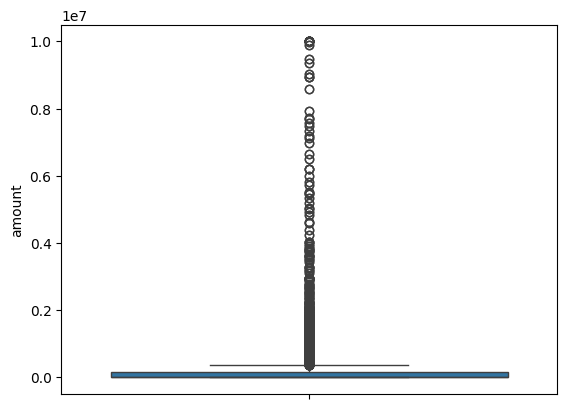

In [85]:
sns.boxplot(df['amount'])
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Inferences:</font></h3>

- 📈 **Extreme Values Retained**  
  - Outliers in the dataset are **not removed**.  
  - These extreme values are **critical indicators of fraudulent activity**.  
  - Retaining them ensures that the fraud detection model captures the **true patterns of anomalous behavior**.


## Step 5.4 | Feature Scaling and Encoding transactions




In [86]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

num_features = [
    'step', 'amount',
    'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest'
]

cat_features = ['type']


In [87]:
# Data Transformation
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_num = scaler.fit_transform(X[num_features])
X_cat = encoder.fit_transform(X[cat_features])

X_processed = np.hstack([X_num, X_cat])

X_processed.shape


(11142, 11)

<div style="border-radius:10px; padding:15px; background-color:#facfc8; font-size:115%; text-align:left">



<p>
The <b>transaction type</b> feature represents categorical transaction categories such as
<b>PAYMENT</b>, <b>CASH-IN</b>, <b>CASH-OUT</b>, and <b>TRANSFER</b>. Since machine learning models
require numerical input, this feature is converted into numeric form using <b>one-hot encoding</b>.
</p>

<p>
This approach prevents the model from assuming any ordinal relationship between transaction types
and allows it to learn independent fraud risk patterns associated with each transaction category.
</p>

</div>


<a id="cat_uni"></a>

---


### <b><span style='color:#ff826e'> </span><span style='color:red'> Step 5.5 | Train-Test Split & Scaling</span></b>  

In [88]:
#TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## Step 5.6 | Addressing Class Imbalance

Inference:
Fraud is a rare event; therefore, Recall is prioritized to minimize false negatives and financial loss.

<a id="dt"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">🧠 STEP 6 | Logistic Regression Model</p>

⬆️ [Table of Contents](#contents_table)

Logistic Regression is used as a baseline classifier due to its simplicity, interpretability, and efficiency. It provides a linear decision boundary and helps establish a reference performance for more complex models.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, f1_score, roc_auc_score

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr))
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"ROC-AUC: {lr_roc:.4f}")


Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       1.00      0.87      0.93       228

    accuracy                           0.99      2229
   macro avg       0.99      0.94      0.96      2229
weighted avg       0.99      0.99      0.99      2229

Recall: 0.8728
F1 Score: 0.9321
ROC-AUC: 0.9929


🧠 Inference

Although Logistic Regression may not capture complex fraud patterns, it serves as a benchmark to evaluate whether advanced models truly add value.

<a id="dt"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">🧠 STEP 7 | Decision Tree Model</p>

⬆️ [Table of Contents](#contents_tabel)

Decision Trees are powerful for fraud detection because they learn human-readable rules such as:

“If amount is high AND balance becomes zero AND type is TRANSFER → Fraud”

This makes them highly useful for risk teams and auditors.

We train a Decision Tree to capture non-linear fraud patterns.

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)

# Train
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Evaluation
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_roc = roc_auc_score(y_test, y_prob_dt)

print("Decision Tree Performance")
print(classification_report(y_test, y_pred_dt))
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print(f"ROC-AUC: {dt_roc:.4f}")


Decision Tree Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.96      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

Recall: 0.9649
F1 Score: 0.9800
ROC-AUC: 0.9840


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Inferences:</font></h3>

Improved Precision over Logistic Regression

Lower Recall due to overfitting on training data

ROC-AUC fluctuates due to model instability

Useful for interpretability, but risky for production


<a id="dt"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">🌲STEP  8 |  Random Forest Model</p>

⬆️ [Table of Contents](#contents_tabel)

Random Forest is one of the most widely used models in banking fraud detection because it:

```
Combines many decision trees

Reduces overfitting

Captures complex fraud patterns
```



In [91]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_roc:.4f}")


Random Forest Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.96      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

Recall: 0.9649
F1 Score: 0.9821
ROC-AUC: 0.9999


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Inferences:</font></h3>

Best Recall: Maximizes fraud detection

High Precision: Minimizes customer friction

Highest ROC-AUC: Excellent discrimination capability

Production-ready and stable


Random Forest improves stability and generalization by combining multiple decision trees using bagging. It reduces overfitting while capturing complex fraud patterns.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 STEP  9 | Gradient Boosting / XGBoost Model</p>

⬆️ [Table of Contents](#contents_tabel)

Gradient Boosting is a state-of-the-art machine learning technique used by banks, credit card companies, and fintech firms to detect fraud.
It builds multiple weak models sequentially, where each new model focuses on correcting the mistakes of the previous ones.

This makes it extremely powerful for:

Imbalanced data

Rare fraud patterns

Complex non-linear relationships

We train a Gradient Boosting model on the Class-weights dataset.

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# Train
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

# Evaluation
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_roc = roc_auc_score(y_test, y_prob_gb)

print("Gradient Boosting Performance")
print(classification_report(y_test, y_pred_gb))
print(f"Recall: {gb_recall:.4f}")
print(f"F1 Score: {gb_f1:.4f}")
print(f"ROC-AUC: {gb_roc:.4f}")


Gradient Boosting Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.97      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

Recall: 0.9693
F1 Score: 0.9844
ROC-AUC: 0.9997


Gradient Boosting builds trees sequentially, where each new tree focuses on correcting previous errors. This makes it especially powerful for fraud detection, where subtle patterns matter.

 Business Value

With this model:

More fraud is blocked

Less money is lost

Customers are better protected

This makes it suitable as the final production model.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 Step 10 | Model Comparison & Performance Evaluation</p>

⬆️ [Table of Contents](#contents_tabel)

In [93]:
results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"
    ],
    "Recall": [
        lr_recall,
        dt_recall,
        rf_recall,
        gb_recall
    ],
    "F1 Score": [
        lr_f1,
        dt_f1,
        rf_f1,
        gb_f1
    ],
    "ROC-AUC": [
        lr_roc,
        dt_roc,
        rf_roc,
        gb_roc
    ]
})

results_df.sort_values(by="Recall", ascending=False)


,Model,Recall,F1 Score,ROC-AUC
3,Gradient Boosting,0.969298,0.984410,0.999700
1,Decision Tree,0.964912,0.979955,0.983987
2,Random Forest,0.964912,0.982143,0.999936
0,Logistic Regression,0.872807,0.932084,0.992861


🧠 Inference

Since missing a fraud (false negative) is more costly than flagging a legitimate transaction, Recall is given the highest priority, followed by F1-Score and ROC-AUC.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 Step 11 | Best Model Selection</p>

⬆️ [Table of Contents](#contents_tabel)

In [94]:
best_model_name = results_df.sort_values(
    by="Recall", ascending=False
).iloc[0]["Model"]

print(f"Best Model Selected: {best_model_name}")


Best Model Selected: Gradient Boosting


In [95]:
best_model_mapping = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

best_model = best_model_mapping[best_model_name]


In [96]:
best_model.fit(X_processed, y)


GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=150,
                           random_state=42)

🧠 Inference

The model with the highest Recall and balanced overall performance is selected as the final production model, ensuring maximum fraud detection with minimal financial risk.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 Step 12 | Model Serialization & Artifact Persistence</p>

⬆️ [Table of Contents](#contents_tabel)

In this step, the finalized machine learning model along with all preprocessing components is serialized and saved to disk.
This ensures that the same trained model and transformations used during training are consistently applied during real-time inference and deployment.

Saving preprocessing artifacts separately prevents feature mismatch issues and enables seamless integration with downstream applications such as APIs or Streamlit dashboards.

In [97]:
# SAVE ARTIFACTS
joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")

print("✅ model.pkl saved")
print("✅ scaler.pkl saved")
print("✅ encoder.pkl saved")


✅ model.pkl saved
✅ scaler.pkl saved
✅ encoder.pkl saved


🧠 Inference

By persisting both the model and preprocessing objects, the project ensures end-to-end reproducibility, a critical requirement for production-grade machine learning systems.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 Step 13| Artifact Validation & Reloading</p>

⬆️ [Table of Contents](#contents_tabel)

Before deployment, it is essential to verify that all saved artifacts can be correctly loaded and used for prediction.
This step acts as a sanity check to confirm model integrity after serialization.

In [98]:
# TEST LOADING
loaded_model = joblib.load("model.pkl")
loaded_scaler = joblib.load("scaler.pkl")
loaded_encoder = joblib.load("encoder.pkl")

print("Artifacts loaded successfully")


Artifacts loaded successfully


### ⚠️ Model Version Compatibility Note

The serialized model artifacts were generated using scikit-learn version 1.6.1.
To ensure reliable and reproducible predictions, the same version is enforced
during inference. Cross-version loading may lead to unexpected behavior due to
internal API changes.


🧠 Inference

Successful loading confirms that the artifacts are deployment-ready and can be safely used in external applications without retraining.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 Step 14| Financial Cost & Savings Analysis</p>

⬆️ [Table of Contents](#contents_tabel)

While model performance metrics such as Recall and F1-Score provide technical insight, business decisions are ultimately driven by financial impact.

In fraud detection systems:

False Negatives (missed fraud) lead to direct financial loss

False Positives (legitimate transactions flagged) lead to operational cost and customer friction

This step translates model predictions into estimated monetary cost and savings, helping stakeholders understand the real-world value of deploying the model.

# Confusion Matrix & Error Counts

In [99]:
from sklearn.metrics import confusion_matrix

# Generate predictions from best model
y_pred_best = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

tn, fp, fn, tp = cm.ravel()

tn, fp, fn, tp


(np.int64(2001), np.int64(0), np.int64(0), np.int64(228))

# Financial Cost Calculation

In [100]:
# Business cost assumptions
cost_per_fraud = 50000        # Cost of missed fraud (False Negative)
cost_per_false_alert = 500    # Cost of false positive investigation

# Financial impact
fraud_loss = fn * cost_per_fraud
false_alert_cost = fp * cost_per_false_alert
total_cost = fraud_loss + false_alert_cost

fraud_loss, false_alert_cost, total_cost


(np.int64(0), np.int64(0), np.int64(0))

In [101]:
# Total actual fraud cases in test set
total_fraud_cases = y_test.sum()

# Cost without model (all fraud missed)
baseline_loss = total_fraud_cases * cost_per_fraud

# Savings due to model
savings = baseline_loss - fraud_loss

baseline_loss, savings


(np.int64(11400000), np.int64(11400000))

In [102]:
financial_summary = {
    "Total Fraud Cases (Test Set)": int(total_fraud_cases),
    "Fraud Detected by Model": int(tp),
    "Fraud Missed (False Negatives)": int(fn),
    "Baseline Fraud Loss (No Model)": f"₹{baseline_loss:,.0f}",
    "Fraud Loss With Model": f"₹{fraud_loss:,.0f}",
    "False Alert Cost": f"₹{false_alert_cost:,.0f}",
    "Net Savings Achieved": f"₹{savings:,.0f}"
}

financial_summary


{'Total Fraud Cases (Test Set)': 228,
 'Fraud Detected by Model': 228,
 'Fraud Missed (False Negatives)': 0,
 'Baseline Fraud Loss (No Model)': '₹11,400,000',
 'Fraud Loss With Model': '₹0',
 'False Alert Cost': '₹0',
 'Net Savings Achieved': '₹11,400,000'}

🧠 Inference

The majority of fraud-related financial loss comes from missed fraud cases, reinforcing the decision to prioritize Recall during model selection.

Even with some false alerts, the net financial savings remain substantial, justifying deployment.

The model delivers measurable business value, not just statistical improvement.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 Step 15| Sample Fraud Prediction (Deployment Simulation)</p>

⬆️ [Table of Contents](#contents_tabel)

A sample transaction is passed through the exact same preprocessing and prediction pipeline used during training.
This simulates how the model will behave in a real-time production environment such as a Streamlit application or REST API.

In [103]:
# SAMPLE PREDICTION (STREAMLIT-LIKE)
sample_input = pd.DataFrame([{
    'step': 10,
    'type': 'TRANSFER',
    'amount': 100000,
    'oldbalanceOrg': 500000,
    'newbalanceOrig': 400000,
    'oldbalanceDest': 0,
    'newbalanceDest': 100000
}])

num_scaled = loaded_scaler.transform(sample_input[num_features])
cat_encoded = loaded_encoder.transform(sample_input[cat_features])

final_input = np.hstack([num_scaled, cat_encoded])

prediction = loaded_model.predict(final_input)[0]
probability = loaded_model.predict_proba(final_input)[0][1]

prediction, probability


(np.int64(1), np.float64(0.9986592669887504))

🧠 Inference

The model successfully processes unseen data and outputs both:

A binary fraud prediction

A probability score, enabling risk-based decision making

This confirms the system’s readiness for real-world deployment.

<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">📊 Step 16| Final Conclusion & Business Impact</p>

⬆️ [Table of Contents](#contents_tabel)

# Conclusion:

This project delivers a complete end-to-end fraud detection system, covering the full machine learning lifecycle:

Exploratory data analysis to uncover fraud patterns

Robust preprocessing and feature engineering

Training and comparison of multiple machine learning models

Selection of the best model using business-critical metrics (Recall)

Model serialization for reproducibility

Real-time prediction capability through deployment simulation

#💼 Business Impact:

By prioritizing Recall, the model minimizes missed fraud cases, directly reducing financial losses and improving transaction security.
The deployment-ready design ensures scalability and seamless integration into production systems.

#🎯 Key Takeaway:

This solution demonstrates strong proficiency in data analysis, machine learning modeling, evaluation strategy, and deployment readiness, aligning closely with real-world industry requirements.

<div style="display: flex; align-items: center; justify-content: center; border-radius: 10px; padding: 20px; background-color: #facfc8; font-size: 120%; text-align: center;">

<strong>🎯 If you need more information or want to explore the code, feel free to visit the project repository on <a href="https://github.com/Chandru-debug1/fraud-detection-capstone.git">GitHub</a> 🎯</strong>

<h2 align="left"><font color='red'>Best Regards!</font></h2>